In [96]:
from mxnet import gluon
from mxnet import ndarray as nd

def transform(data, label):
    return data.astype('float32')/255, label.astype('float32')
mnist_train = gluon.data.vision.MNIST(root= r'E:\Data\MXNet\mnist', train=True, transform= transform)
mnist_test = gluon.data.vision.MNIST(root= r'E:\Data\MXNet\mnist', train=False, transform= transform)

C:\Anaconda3\lib\site-packages\mxnet\gluon\data\vision.py:118: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(fin.read(), dtype=np.uint8).astype(np.int32)
C:\Anaconda3\lib\site-packages\mxnet\gluon\data\vision.py:122: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8)


Populating the interactive namespace from numpy and matplotlib


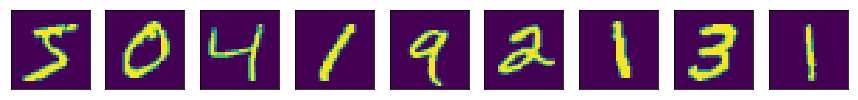

In [43]:
%pylab inline

data, label = mnist_train[:9]
def show_image(images):
    n = images.shape[0]
    _, figs = plt.subplots(1, n, figsize= (15, 15))
    [figs[i].imshow(data[i].reshape((28, 28)).asnumpy()) for i in range(n)]
    [figs[i].axes.get_xaxis().set_visible(False) for i in range(n)]
    [figs[i].axes.get_yaxis().set_visible(False) for i in range(n)]
    plt.show
    
show_image(data)

In [97]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size, shuffle=True)
test_data = gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

In [51]:
num_inputs = 784
num_outputs = 10

w = nd.random_normal(shape= (num_inputs, num_outputs))
b = nd.zeros(num_outputs)

params = [w, b]
for param in params:
    param.attach_grad()

In [57]:
def softmax(X):
    exp = nd.exp(X)
    partition = exp.sum(axis= 1, keepdims= True)
    return exp / partition

In [61]:
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), w) + b)

In [62]:
def cross_entropy(y, y_):
    return - nd.pick(nd.log(y_), y)

In [81]:
x = [[ 1.,  2.],
     [ 3.,  4.],
     [ 5.,  6.]]

y = [1.,  0., 1]

x = nd.array(x)
y = nd.array(y)
nd.pick(x, y, 1)


[2. 3. 6.]
<NDArray 3 @cpu(0)>

In [82]:
def accuracy(output, label):
    return nd.mean(output.argmax(axis= 1)== label).asscalar()

$\hat y$

In [84]:
def evaluate_accuracy(data_iterator, net):
    acc = 0.
    for data, label in data_iterator:
        output = net(data)
        acc += accuracy(output, label)
    return acc / len(data_iterator)

In [85]:
evaluate_accuracy(test_data, net)

0.06826171875

In [98]:
import sys
sys.path.append('..')
from mxnet.optimizer import SGD
from mxnet import autograd

learning_rate = .1

for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data, label in train_data:
        with autograd.record():
            output = net(data)
            loss = cross_entropy(output, label)
        loss.backward()
        # 将梯度做平均，这样学习率会对 batch size 不那么敏感
        SGD(params, learning_rate/batch_size)

        train_loss += nd.mean(loss).asscalar()
        train_acc += accuracy(output, label)

    test_acc = evaluate_accuracy(test_data, net)
    print("Epoch %d. Loss: %f, Train acc %f, Test acc %f" % (
        epoch, train_loss/len(train_data), train_acc/len(train_data), test_acc))

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

In [99]:
SGD?

In [92]:
import mxnet as mx